In [1]:
#Importing sympy and numpy to do the necessary calculatioins

from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
import random

Assigning symbols for Matrix

In [2]:
a,b,e0=symbols('A,B,E_0')

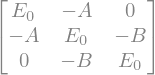

In [3]:
H=Matrix([[e0,-a,0],[-a,e0,-b],[0,-b,e0]])
H #Question 1

Calculating eigenvalues(Question 1)

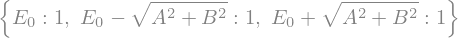

In [4]:
H.eigenvals()

Computing eigenvectors(Question 1)

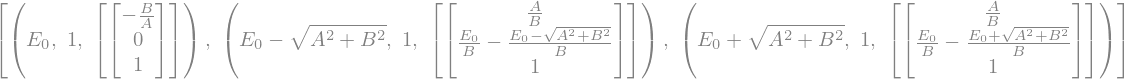

In [5]:
H.eigenvects()

Finding the basis transformation matrix P (Question 1)

In [6]:
P,D=H.diagonalize()

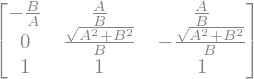

In [7]:
P

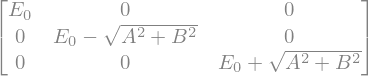

In [8]:
D   #Diagonalized matrix of eigen basis

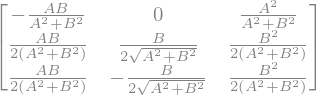

In [9]:
simplify(P.inv())#Calculating inverse matrix for transferring inital conditions from physical basis to eigen basis

In [10]:
Pinv=simplify(P.inv())

In [11]:
simplify(P*D*P.inv())==H

True

Getting the solution matrix (U)

In [12]:
v1,v2,v3=symbols('e\u207D-i\u03BB\u2081t\u2044h\u207E,e\u207D-i\u03BB\u2082t\u2044h\u207E,e\u207D-i\u03BB\u2083t\u2044h\u207E')

In [13]:
U = Matrix([[v1, 0, 0], [0, v2, 0], [0, 0, v3]])
display(U)

C:\Users\Abc\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Abc\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Abc\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Abc\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBackendBit

⎡e⁽-iλ₁t⁄h⁾      0           0     ⎤
⎢                                  ⎥
⎢    0       e⁽-iλ₂t⁄h⁾      0     ⎥
⎢                                  ⎥
⎣    0           0       e⁽-iλ₃t⁄h⁾⎦

Question 3 Calculating PUP^-1 matrix

In [14]:
PUPinv = simplify(P*U*P.inv())
display(PUPinv)

⎡ 2                                                                           
⎢A ⋅(e⁽-iλ₂t⁄h⁾ + e⁽-iλ₃t⁄h⁾)    2                                            
⎢──────────────────────────── + B ⋅e⁽-iλ₁t⁄h⁾                                 
⎢             2                                 A⋅(e⁽-iλ₂t⁄h⁾ - e⁽-iλ₃t⁄h⁾)  A
⎢────────────────────────────────────────────   ───────────────────────────  ─
⎢                   2    2                                  _________         
⎢                  A  + B                                  ╱  2    2          
⎢                                                      2⋅╲╱  A  + B           
⎢                                                                             
⎢         A⋅(e⁽-iλ₂t⁄h⁾ - e⁽-iλ₃t⁄h⁾)             e⁽-iλ₂t⁄h⁾   e⁽-iλ₃t⁄h⁾     
⎢         ───────────────────────────             ────────── + ──────────     
⎢                     _________                       2            2          
⎢                    ╱  2    2                      

Question 4 Calculating the values using the inital condition.

In [15]:
init = Matrix([1, 0, 0])
int_pupinv = simplify(PUPinv*init)
display(int_pupinv)

⎡ 2                                           ⎤
⎢A ⋅(e⁽-iλ₂t⁄h⁾ + e⁽-iλ₃t⁄h⁾)    2            ⎥
⎢──────────────────────────── + B ⋅e⁽-iλ₁t⁄h⁾ ⎥
⎢             2                               ⎥
⎢──────────────────────────────────────────── ⎥
⎢                   2    2                    ⎥
⎢                  A  + B                     ⎥
⎢                                             ⎥
⎢         A⋅(e⁽-iλ₂t⁄h⁾ - e⁽-iλ₃t⁄h⁾)         ⎥
⎢         ───────────────────────────         ⎥
⎢                     _________               ⎥
⎢                    ╱  2    2                ⎥
⎢                2⋅╲╱  A  + B                 ⎥
⎢                                             ⎥
⎢A⋅B⋅(-2⋅e⁽-iλ₁t⁄h⁾ + e⁽-iλ₂t⁄h⁾ + e⁽-iλ₃t⁄h⁾)⎥
⎢─────────────────────────────────────────────⎥
⎢                   ⎛ 2    2⎞                 ⎥
⎣                 2⋅⎝A  + B ⎠                 ⎦

Question 6

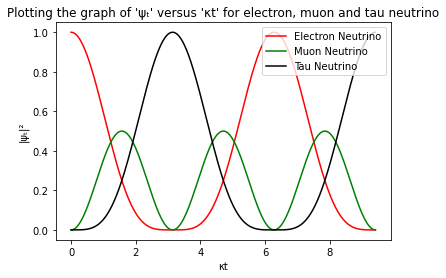

In [16]:
#Plotting probablities of electron, muon and tau neutrino

def psielectron(kt):
    return (0.5*np.cos(kt)+0.5)**2
def psimu(kt):
    return np.sin(kt)**2/2
def psitau(kt):
    return (0.5*np.cos(kt)-0.5)**2
kt=np.arange(0,3*np.pi,0.01)
plt.plot(kt, psielectron(kt), '-r', label='Electron Neutrino')
plt.plot(kt, psimu(kt), '-g',label='Muon Neutrino')
plt.plot(kt, psitau(kt), '-000000',label='Tau Neutrino')
plt.title("Plotting the graph of '\u03C8\u209C' versus '\u03BAt' for electron, muon and tau neutrino")
plt.xlabel('\u03BAt')
plt.ylabel('|\u03C8\u209C|\u00B2')
plt.legend()
plt.show()

Coupled Oscillator

In [17]:
w1,w2=symbols('w1,w2')

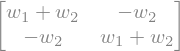

In [18]:
A=Matrix([[w1+w2,-w2],[-w2,w1+w2]])
A